In [109]:
!pip install lgtm
!pip install lightgbm
!pip install dalex

     ---------------------------------------- 1.0/1.0 MB 365.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046001 sha256=621bdf577859ce8c6dc385fcbefedc38add88ab0fdf4e441161531e8867e44b4
  Stored in directory: c:\users\tooba.alvi\appdata\local\pip\cache\wheels\3e\dc\80\530757389f7587f2b1cd02e5a0a11dd986b232b06eacebcf8d
Successfully built dalex


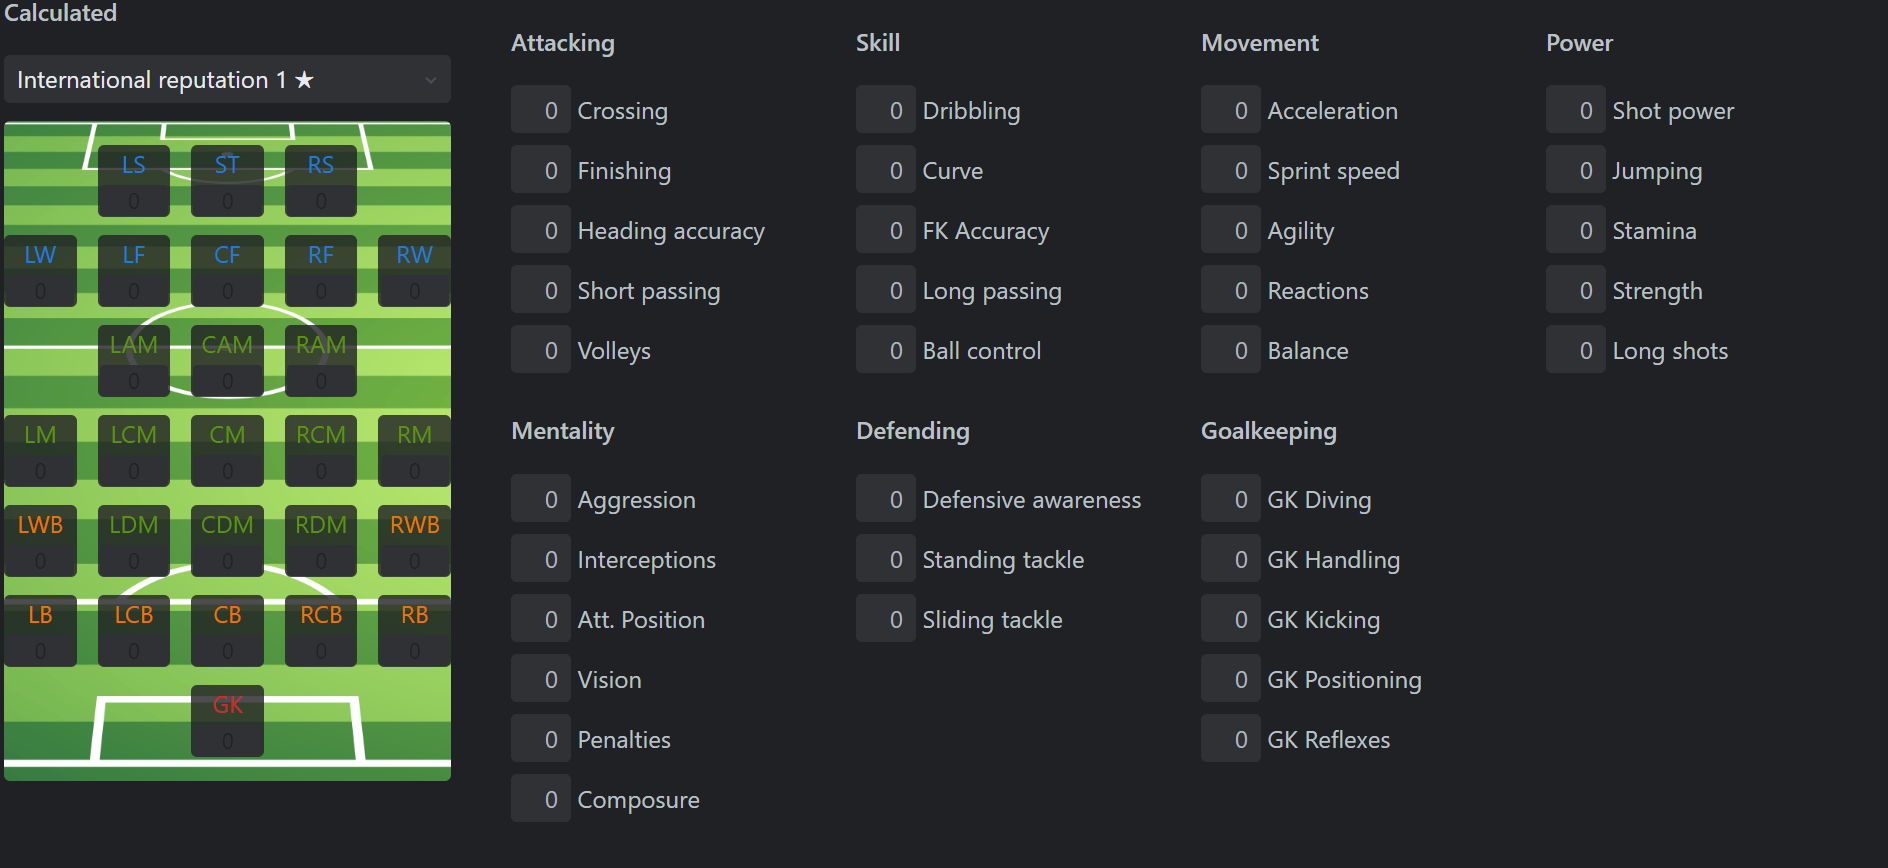

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats import weightstats as stests

In [72]:
df1 = pd.read_excel('Career Mode player datasets - FIFA 21.xlsx')

In [73]:
df1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [74]:
df1.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=105)

In [82]:
test_list = ['age', 'overall', 'potential', 'value_eur','wage_eur', 'international_reputation', 'height_cm', 'weight_kg',
              'weak_foot', 'skill_moves', 'attacking_crossing',
              'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
              'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
              'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
              'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
              'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
              'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
             'goalkeeping_handling','goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']


In [92]:
skills =['attacking_crossing',
              'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
              'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
              'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
              'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
              'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
             'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
             'goalkeeping_handling','goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [ ]:
# 

In [93]:
for i in skills:
    name = df1.loc[df1[i].idxmax()]['short_name']
    print('Best '+ i +': '+name)

Best attacking_crossing: K. De Bruyne
Best attacking_finishing: L. Messi
Best attacking_heading_accuracy: L. de Jong
Best attacking_short_passing: K. De Bruyne
Best attacking_volleys: L. Suárez
Best skill_dribbling: L. Messi
Best skill_curve: Quaresma
Best skill_fk_accuracy: L. Messi
Best skill_long_passing: K. De Bruyne
Best skill_ball_control: L. Messi
Best movement_acceleration: Adama Traoré
Best movement_sprint_speed: K. Mbappé
Best movement_agility: Neymar Jr
Best movement_reactions: Cristiano Ronaldo
Best movement_balance: E. Oztumer
Best power_shot_power: A. Kolarov
Best power_jumping: Cristiano Ronaldo
Best power_stamina: V. Darida
Best power_strength: A. Akinfenwa
Best power_long_shots: L. Messi
Best mentality_aggression: K. Gjasula
Best mentality_interceptions: N. Kanté
Best mentality_positioning: Cristiano Ronaldo
Best mentality_vision: L. Messi
Best mentality_penalties: Neymar Jr
Best mentality_composure: L. Messi
Best defending_standing_tackle: V. van Dijk
Best defending_s

In [89]:
test_sample= df1[['age', 'overall', 'potential', 'value_eur','wage_eur', 'international_reputation', 'height_cm', 'weight_kg',
              'weak_foot', 'skill_moves', 'attacking_crossing',
              'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
              'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
              'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
              'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
              'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
              'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
             'goalkeeping_handling','goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
test_sample

,age,overall,potential,value_eur,wage_eur,international_reputation,height_cm,weight_kg,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,93,93,67500000,560000,5,170,72,4,4,...,75,96,NaN,35,24,6,11,15,14,8
1,35,92,92,46000000,220000,5,187,83,4,5,...,84,95,NaN,32,24,7,11,15,14,11
2,27,91,93,75000000,125000,3,188,87,3,1,...,11,68,NaN,12,18,87,92,78,90,90
3,31,91,91,80000000,240000,4,184,80,4,4,...,88,88,NaN,42,19,15,6,12,8,10
4,28,91,91,90000000,270000,5,175,68,5,5,...,92,93,NaN,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,24,47,52,40000,500,1,176,73,2,2,...,39,36,NaN,39,54,10,9,14,6,6
18940,21,47,52,35000,1000,1,177,70,2,2,...,35,40,NaN,56,47,12,13,8,14,6
18941,20,47,51,35000,1000,1,185,74,2,2,...,35,40,NaN,55,45,12,9,14,15,13
18942,23,47,51,40000,1000,1,186,80,2,2,...,42,43,NaN,49,45,15,7,7,5,13


In [95]:
test_sample.head()

,age,overall,potential,value_eur,wage_eur,international_reputation,height_cm,weight_kg,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,93,93,67500000,560000,5,170,72,4,4,...,75,96,NaN,35,24,6,11,15,14,8
1,35,92,92,46000000,220000,5,187,83,4,5,...,84,95,NaN,32,24,7,11,15,14,11
2,27,91,93,75000000,125000,3,188,87,3,1,...,11,68,NaN,12,18,87,92,78,90,90
3,31,91,91,80000000,240000,4,184,80,4,4,...,88,88,NaN,42,19,15,6,12,8,10
4,28,91,91,90000000,270000,5,175,68,5,5,...,92,93,NaN,30,29,9,9,15,15,11


In [97]:
test_sample.columns

Index(['age', 'overall', 'potential', 'value_eur', 'wage_eur',
       'international_reputation', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_re

# T-test to check the Association of Player Value with other variables

In [38]:
for i in test_list:
    ttest,pval = stats.ttest_ind(df1.value_eur, df1[i])
    print('p-value for 2 sampled T-test of Value in euros & '+ i +' is ' , pval)
    if pval <0.05:
        print("So, we reject null hypothesis")
    else:
        print("So, we accept null hypothesis")

p-value for 2 sampled T-test of Value in euros & age is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & overall is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & potential is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & wage_eur is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & international_reputation is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & height_cm is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & weight_kg is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & weak_foot is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & skill_moves is  0.0
So, we reject null hypothesis
p-value for 2 sampled T-test of Value in euros & attacking_crossing is  0.0
So, we reject null hypothesis
p-value for 2

# Z-test to check the Association of Player Value with other variables

In [39]:
for i in test_list:
    ztest,pval = stests.ztest(df1.value_eur, x2=df1[i], value=0, alternative='two-sided')
    print('p-value for 2 sampled Z-test of Value & '+ i +' is ' , pval)
    if pval <0.05:
        print("So, we reject null hypothesis")
    else:
        print("So, we accept null hypothesis")

p-value for 2 sampled Z-test of Value & age is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & overall is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & potential is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & wage_eur is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & international_reputation is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & height_cm is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & weight_kg is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & weak_foot is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & skill_moves is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & attacking_crossing is  0.0
So, we reject null hypothesis
p-value for 2 sampled Z-test of Value & attacking_finishing is  0.0
So, we reject null hypothesis
p-val

### Anova test of Value with Prefered Foot of the player

In [42]:
df_anova_1 = df1[['value_eur','preferred_foot']]
grps = pd.unique(df_anova_1['preferred_foot'].values)
grps

array(['Left', 'Right'], dtype=object)

In [43]:
d_data = {grp:df_anova_1['value_eur'][df_anova_1['preferred_foot'] == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Left'], d_data['Right'])
print('p-value for Anova-test of Value & Preferred Foot is ', p)
if p <0.05:
    print("So, we reject null hypothesis")
else:
    print("So, we accept null hypothesis")

p-value for Anova-test of Value & Preferred Foot is  0.0013889624196124415
So, we reject null hypothesis


### Anova test of Value with Worker Rate of the player

In [47]:
df_anova_2 = df1[['value_eur','work_rate']]
grps = pd.unique(df_anova_2['work_rate'].values)
grps


array(['Medium/Low', 'High/Low', 'Medium/Medium', 'High/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [51]:
d_data = {grp:df_anova_2['value_eur'][df_anova_2['work_rate'] == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Medium/Medium'], d_data['High/Low'], d_data['High/Medium'], d_data['High/High'],
                      d_data['Medium/High'], d_data['Medium/Low'], d_data['Low/High'], d_data['Low/Medium'], d_data['Low/Low'])
print('p-value for Anova-test of Value & Work Rate is ', p)
if p <0.05:
    print("So, we reject null hypothesis")
else:
    print("So, we accept null hypothesis")

p-value for Anova-test of Value & Work Rate is  3.3204498820431914e-140
So, we reject null hypothesis


### Anova test of Value with Body Type of the player

In [52]:
df_anova = df1[['value_eur','body_type']]
grps = pd.unique(df_anova['body_type'].values)
grps

array(['Messi', 'C. Ronaldo', 'PLAYER_BODY_TYPE_259',
       'PLAYER_BODY_TYPE_276', 'Neymar', 'PLAYER_BODY_TYPE_321',
       'PLAYER_BODY_TYPE_343', 'PLAYER_BODY_TYPE_262',
       'PLAYER_BODY_TYPE_314', 'PLAYER_BODY_TYPE_312',
       'PLAYER_BODY_TYPE_313', 'Mohamed Salah', 'Courtois',
       'PLAYER_BODY_TYPE_322', 'PLAYER_BODY_TYPE_352', 'Normal',
       'PLAYER_BODY_TYPE_273', 'PLAYER_BODY_TYPE_358',
       'PLAYER_BODY_TYPE_325', 'PLAYER_BODY_TYPE_320', 'Lean',
       'PLAYER_BODY_TYPE_368', 'PLAYER_BODY_TYPE_342',
       'PLAYER_BODY_TYPE_300', 'PLAYER_BODY_TYPE_356',
       'PLAYER_BODY_TYPE_336', 'PLAYER_BODY_TYPE_283',
       'PLAYER_BODY_TYPE_316', 'PLAYER_BODY_TYPE_319',
       'PLAYER_BODY_TYPE_311', 'PLAYER_BODY_TYPE_310',
       'PLAYER_BODY_TYPE_365', 'PLAYER_BODY_TYPE_374',
       'PLAYER_BODY_TYPE_345', 'PLAYER_BODY_TYPE_253',
       'PLAYER_BODY_TYPE_305', 'PLAYER_BODY_TYPE_266',
       'PLAYER_BODY_TYPE_366', 'PLAYER_BODY_TYPE_315',
       'PLAYER_BODY_TYPE_351', 'P

In [54]:
d_data = {grp:df_anova['value_eur'][df_anova['body_type'] == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Messi'], d_data['C. Ronaldo'], d_data['Neymar'], d_data['Lean'],
                      d_data['Normal'], d_data['Courtois'], d_data['Stocky'],
                      d_data['Shaqiri'], d_data['Akinfenwa'])
print('p-value for Anova-test of Value & Body Type is ', p)
if p <0.05:
    print("So, we reject null hypothesis")
else:
    print("So, we accept null hypothesis")

p-value for Anova-test of Value & Body Type is  2.7365369691241535e-229
So, we reject null hypothesis


## USING LIGHT GBM REGRESSOR

In [118]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import numpy as np
X= test_sample.drop(["defending_marking"], axis = 1)
     
y = test_sample['value_eur']

ylog = np.log(y)

X_train, X_test, ylog_train, ylog_test, y_train, y_test = train_test_split(X, ylog, y, test_size = 0.25, random_state = 4)
gbm_model = LGBMRegressor()
gbm_model.fit(X_train, ylog_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3177
[LightGBM] [Info] Number of data points in the train set: 14208, number of used features: 43
[LightGBM] [Info] Start training from score -1210585546881432358211257544686436352.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\tooba.alvi\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



LGBMRegressor()

In [119]:
import dalex as dx
def predict_function(model, data):
    return np.exp(model.predict(data))
    
fifa_gbm_exp = dx.Explainer(gbm_model, X_test, y_test, 
    predict_function = predict_function, label = 'gbm')

Preparation of a new explainer is initiated

  -> data              : 4736 rows 43 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 4736 values
  -> data              : A column identical to the target variable `y` has been found in the `data`.
  -> data              : It is highly recommended to pass `data` without the target variable column.
  -> model_class       : lightgbm.sklearn.LGBMRegressor (default)
  -> label             : gbm
  -> predict function  : <function predict_function at 0x0000022352B29700> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.0, max = 0.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.0, mean = 2.28e+06, max = 8e+07
  -> model_info        : package lightgbm

A new explainer has been created!


In [120]:
fifa_md_gbm = fifa_gbm_exp.model_diagnostics()
fifa_md_gbm.plot(variable = "y", yvariable = "y_hat")


## USING RANDOM FOREST CLASSIFIER

In [129]:
from sklearn.model_selection import train_test_split
X= test_sample.drop(["defending_marking"], axis = 1)
y = test_sample['value_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


In [132]:
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor1 = RandomForestRegressor()
regressor1.fit(X_train, y_train)

y_pred1 = regressor1.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_pred1, y_test)

print("The RMSE value for Random Forest Regression is: ", rmse)
print("The R2 score for Random Forest Regression is: ", r2)


The RMSE value for Random Forest Regression is:  486888.80624042643
The R2 score for Random Forest Regression is:  0.9913271121960474
